# Data Wrangling Project: WeRateDogs Twitter Data

In [1]:
#importing requierd libraries
import pandas as pd
import requests
import os
import tweepy
import numpy as np
import re
import json
import seaborn as ses
from scipy import stats
%matplotlib inline


# Data Gathering

In [2]:
folder_name = 'folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [3]:
with open(os.path.join(folder_name,url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
os.listdir(folder_name)

['image-predictions.tsv']

In [5]:
image_pred = pd.read_csv('image-predictions.tsv',sep = '\t')

In [6]:
twit_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [7]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
twit_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
with open('tweet-json', 'rb') as f:
    data = f.readlines()


In [10]:
print(type(data))

<class 'list'>


In [11]:
dic_json = []
for d in data:
    res = json.loads(d)
    dic_json.append(res)

In [12]:
df = pd.DataFrame(dic_json)

In [13]:
df.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [14]:
api_df= df.loc[:,['id','retweet_count','favorite_count']]

In [15]:
api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# data Assessing

In [16]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_pred.p2_conf.shape

(2075,)

In [20]:
image_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [21]:
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
# quality issues
# id column in api_df need to change to tweet_id to be consistance with other tables
# id column in api_df type is int, and it should be str
# tweet_id column in tiwit_arch is int, and it should be str
# tweet_id cloumn in image_pred is int, and it should be str
# timestamp column in twit_arch is str and it should be date
# none value in doggo,  floofer , pupper, and puppo columns is a null value
# doggo, pupper, and puppo columns are matually exclosive but there are some common values between them
# retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp should not be included
# alot of missing values in doggo , floofer , pupper, and puppo
# in name column, alot of value is just a, and this is wrong
# p1_dog , p2_dog and p3_dog are str and need to be bool
# p1 , p2 and p3 the name is not descriptive

In [23]:
#Tidiness issuses
# doggo , floofer , pupper, and puppo columns are the same variable so they all need to be one column dog stage 
# rating_numerator and rating_denominator should be one colume rating
# api_df columns and tiwit_arch are single observational unit withc is tweet details

# Data Cleaning

In [24]:
twit_arch_copy = twit_arch.copy()

In [25]:
image_pred_copy = image_pred.copy()

In [26]:
api_df_copy = api_df.copy()

Definition

- change id column name

code

In [27]:
api_df_copy.rename(columns={'id':'tweet_id'}, inplace=True)

test

In [28]:
api_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [29]:
# definition
#merge api_df_copy with twit_arch_copy

code


In [30]:
twit_arch_copy = pd.merge(twit_arch_copy, api_df_copy,
                            on=['tweet_id'], how='left')

test

In [31]:
twit_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

___________________________________________________________
definition

merge image_pred_copy with twit_arch_copy


code

In [32]:
twit_arch_copy = pd.merge(twit_arch_copy, image_pred_copy,
                            on=['tweet_id'], how='left')

test

In [33]:
twit_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

----------------------------------------------------
definition 

melt doggo,floofer,pupper and puppo columns into nwe column called dog_stage

In [34]:
twit_arch_copy.loc[twit_arch_copy.floofer == 'None' , "floofer"] = ""


In [35]:
twit_arch_copy.loc[twit_arch_copy.pupper == 'None' , "pupper"] = ""

In [36]:
twit_arch_copy.loc[twit_arch_copy.puppo == 'None' , "puppo"] = ""

In [37]:
twit_arch_copy.loc[twit_arch_copy.doggo == 'None' , "doggo"] = ""

In [38]:
twit_arch_copy['dog_stage'] = twit_arch_copy['doggo'].astype(str) + twit_arch_copy ['floofer'] + twit_arch_copy['pupper'] + twit_arch_copy['puppo']

In [39]:
twit_arch_copy.drop(['floofer','pupper','puppo','doggo'], axis = 1, inplace = True)

test

In [40]:
twit_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                           

In [41]:
#definition
#convert rating_numerator and rating_denominator to one columns

code

In [42]:
twit_arch_copy['rating'] = twit_arch_copy.rating_numerator / twit_arch_copy.rating_denominator

In [43]:
#drop rating_numerator and rating_denominator columns
twit_arch_copy.drop(['rating_numerator','rating_denominator' ], axis = 1, inplace = True)

test

In [44]:
twit_arch_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,,1.2


test

In [45]:
twit_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
name                          2356 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                    

______________________________
definition

-- delete retweet rows

-- delete retweet 3 columns


code

In [46]:

#twit_arch_copy.drop(twit_arch_copy.retweeted_status_id.isnull 
                                                  #.index)
twit_arch_copy = twit_arch_copy[twit_arch_copy['retweeted_status_id'].isnull()] 

In [47]:
#drop retweeted_status_id, retweeted_user_id and retweeted_status_timestamp columns
twit_arch_copy.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp' ], axis = 1, inplace = True)

In [48]:
twit_arch_copy = twit_arch_copy[twit_arch_copy['in_reply_to_status_id'].isnull()]

In [49]:
twit_arch_copy.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1, inplace = True)

test

In [50]:
twit_arch_copy.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id          2097 non-null int64
timestamp         2097 non-null object
source            2097 non-null object
text              2097 non-null object
expanded_urls     2094 non-null object
name              2097 non-null object
retweet_count     2097 non-null float64
favorite_count    2097 non-null float64
jpg_url           1971 non-null object
img_num           1971 non-null float64
p1                1971 non-null object
p1_conf           1971 non-null float64
p1_dog            1971 non-null object
p2                1971 non-null object
p2_conf           1971 non-null float64
p2_dog            1971 non-null object
p3                1971 non-null object
p3_conf           1971 non-null float64
p3_dog            1971 non-null object
dog_stage         2097 non-null object
rating            2097 non-null float64
dtypes: float64(7), int64(1), object(13)
memory usage: 360.4+ KB



-----------------------------------------------------------------------------
definition

-- change tweet_id column type

code

In [51]:
twit_arch_copy.tweet_id = twit_arch_copy.tweet_id.astype(str)

test

In [52]:
twit_arch_copy.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id          2097 non-null object
timestamp         2097 non-null object
source            2097 non-null object
text              2097 non-null object
expanded_urls     2094 non-null object
name              2097 non-null object
retweet_count     2097 non-null float64
favorite_count    2097 non-null float64
jpg_url           1971 non-null object
img_num           1971 non-null float64
p1                1971 non-null object
p1_conf           1971 non-null float64
p1_dog            1971 non-null object
p2                1971 non-null object
p2_conf           1971 non-null float64
p2_dog            1971 non-null object
p3                1971 non-null object
p3_conf           1971 non-null float64
p3_dog            1971 non-null object
dog_stage         2097 non-null object
rating            2097 non-null float64
dtypes: float64(7), object(14)
memory usage: 360.4+ KB


_______________________________________________________________________

definition

delete rows with out url or image

code

In [53]:
twit_arch_copy = twit_arch_copy[twit_arch_copy['expanded_urls'].notnull()]

test

In [54]:
twit_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id          2094 non-null object
timestamp         2094 non-null object
source            2094 non-null object
text              2094 non-null object
expanded_urls     2094 non-null object
name              2094 non-null object
retweet_count     2094 non-null float64
favorite_count    2094 non-null float64
jpg_url           1971 non-null object
img_num           1971 non-null float64
p1                1971 non-null object
p1_conf           1971 non-null float64
p1_dog            1971 non-null object
p2                1971 non-null object
p2_conf           1971 non-null float64
p2_dog            1971 non-null object
p3                1971 non-null object
p3_conf           1971 non-null float64
p3_dog            1971 non-null object
dog_stage         2094 non-null object
rating            2094 non-null float64
dtypes: float64(7), object(14)
memory usage: 359.9+ KB


________________________________________________________________________________________

definition

_ convert "a" value in name column to None

code

In [55]:
twit_arch_copy = twit_arch_copy.replace('a', np.nan)

test

In [56]:
#test if there is any name value == a
len(twit_arch_copy[twit_arch_copy['name'] == 'a'])

0

In [57]:
twit_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id          2094 non-null object
timestamp         2094 non-null object
source            2094 non-null object
text              2094 non-null object
expanded_urls     2094 non-null object
name              2039 non-null object
retweet_count     2094 non-null float64
favorite_count    2094 non-null float64
jpg_url           1971 non-null object
img_num           1971 non-null float64
p1                1971 non-null object
p1_conf           1971 non-null float64
p1_dog            1971 non-null object
p2                1971 non-null object
p2_conf           1971 non-null float64
p2_dog            1971 non-null object
p3                1971 non-null object
p3_conf           1971 non-null float64
p3_dog            1971 non-null object
dog_stage         2094 non-null object
rating            2094 non-null float64
dtypes: float64(7), object(14)
memory usage: 359.9+ KB


___________________________________________________________________________________________________

definition

-change p1_dog, p2_dog and p3_dog from str into bool

-change p1 , p2 and p3 name to first_prediction ,second_prediction and third_prediction

In [58]:
twit_arch_copy.p1_dog = twit_arch_copy.p1_dog.astype(bool)
twit_arch_copy.p2_dog = twit_arch_copy.p2_dog.astype(bool)
twit_arch_copy.p3_dog = twit_arch_copy.p3_dog.astype(bool)

In [59]:
twit_arch_copy.rename(columns={'p1':'image_first_prediction'}, inplace=True)

In [60]:
twit_arch_copy.rename(columns={'p2':'image_second_prediction'}, inplace=True)

In [61]:
twit_arch_copy.rename(columns={'p3':'image_third_prediction'}, inplace=True)

test

In [62]:
twit_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                   2094 non-null object
timestamp                  2094 non-null object
source                     2094 non-null object
text                       2094 non-null object
expanded_urls              2094 non-null object
name                       2039 non-null object
retweet_count              2094 non-null float64
favorite_count             2094 non-null float64
jpg_url                    1971 non-null object
img_num                    1971 non-null float64
image_first_prediction     1971 non-null object
p1_conf                    1971 non-null float64
p1_dog                     2094 non-null bool
image_second_prediction    1971 non-null object
p2_conf                    1971 non-null float64
p2_dog                     2094 non-null bool
image_third_prediction     1971 non-null object
p3_conf                    1971 non-null float64
p3_dog                     

In [68]:
twit_arch_copy.to_csv('twitter_archive_master.csv', index=False)

# Data Analysing

what is the most predicted breed?

In [63]:
twit_arch_copy.image_first_prediction.value_counts()[:1]

golden_retriever    137
Name: image_first_prediction, dtype: int64

In [64]:
twit_arch_copy.image_second_prediction.value_counts()[:1]

Labrador_retriever    95
Name: image_second_prediction, dtype: int64

In [65]:
twit_arch_copy.image_third_prediction.value_counts()[:1]

Labrador_retriever    76
Name: image_third_prediction, dtype: int64

_____________________________________________________________________________________________________
Insight:
    
    
form the result, the most predicted breed is golden_retriever with 137 predicts

and for the second and third prediction Labrador_retriever is the most predicted one

_____________________________________________________________________________________________________________________

Is there is a relation between number of retweet (retweet_count) and number of likes  (favorite_count) in tweets?

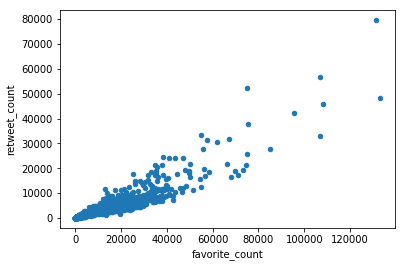

In [66]:
twit_arch_copy.plot(x="favorite_count", y="retweet_count", kind = "scatter")

Insight:


from the graph, yes there is a positive relation between them

_____________________________________________________________________________________

How many photo in each tweet?

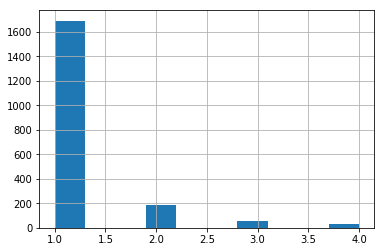

In [67]:
twit_arch_copy["img_num"].hist()

Insight:
    
most of peopl provide one photo